In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
try:
    # For newer matplotlib versions
    plt.style.use('seaborn')
except:
    # For older matplotlib versions
    plt.style.use('default')

# Seaborn settings
sns.set_theme(style="whitegrid")
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully")

Libraries imported successfully


In [ ]:

pathmentalhealth = '../data/cleaned_mental_health_dataset.csv'
pathmentalhealthtech = '../data/cleaned_mental_health_dataset.csv'
pathscreentime = '../data/cleaned_screen_time_dataset.csv'

mental_health_df = pd.read_csv(pathmentalhealth)
screen_time_df = pd.read_csv(pathscreentime)
mental_health_techno_df = pd.read_csv(pathscreentime)


### Modification

In [3]:
mental_health_df['age_group'] = pd.cut(
    mental_health_df['age'], 
    bins=[0, 18, 30, 45, 60, 100], 
    labels=['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'],
    include_lowest=True
)


melted_df = mental_health_df.melt(
    id_vars=['age_group', 'gender'], 
    value_vars=['stress_level', 'weekly_anxiety_score', 'weekly_depression_score'],
    var_name='metric',
    value_name='score'
)

mental_health_df['mental_distress_score'] = (
    mental_health_df['stress_level'] +
    mental_health_df['weekly_anxiety_score'] +
    mental_health_df['weekly_depression_score']
)

mental_health_df['total_screen_time_type_score'] = (
    mental_health_df['phone_usage_hours'] +
    mental_health_df['laptop_usage_hours'] +
    mental_health_df['tablet_usage_hours'] +
    mental_health_df['tv_usage_hours']
)
mental_health_df['screen_time_difference'] = (
    mental_health_df['daily_screen_time_hours'] - mental_health_df['total_screen_time_type_score']
)

mental_health_df['total_screen_time_usage_score'] = (
    mental_health_df['social_media_hours'] +
    mental_health_df['work_related_hours'] +
    mental_health_df['entertainment_hours'] +
    mental_health_df['gaming_hours']
)


### plots

#### global anxiety

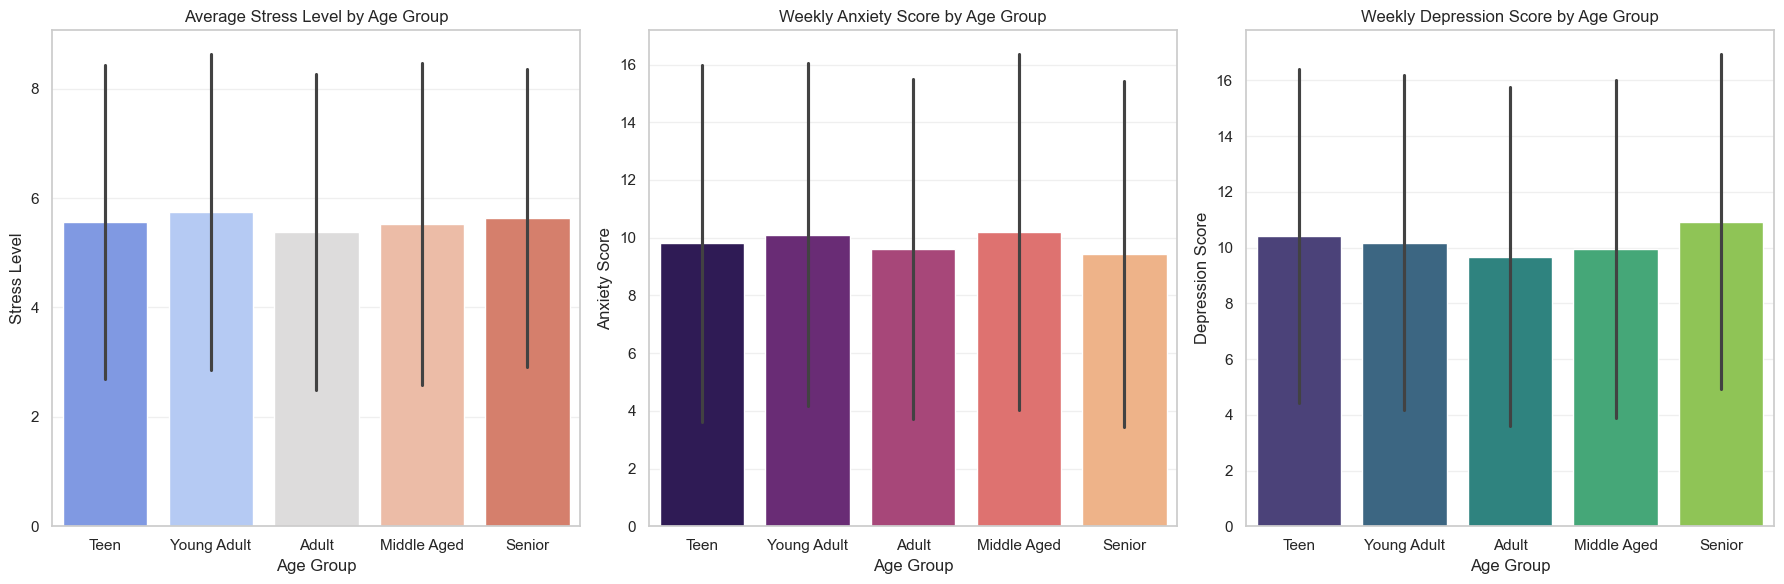

In [ ]:
# Create 1 row, 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot 1: Stress Level
sns.barplot(x='age_group', y='stress_level', data=mental_health_df, palette='coolwarm', ci='sd', ax=axes[0])
axes[0].set_title('Average Stress Level by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Stress Level')
axes[0].grid(True, axis='y', alpha=0.3)

# Plot 2: Weekly Anxiety Score
sns.barplot(x='age_group', y='weekly_anxiety_score', data=mental_health_df, palette='magma', ci='sd', ax=axes[1])
axes[1].set_title('Weekly Anxiety Score by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Anxiety Score')
axes[1].grid(True, axis='y', alpha=0.3)

print(max(mental_health_df['weekly_anxiety_score']))
print(min(mental_health_df['weekly_anxiety_score']))
#print((mental_health_df['weekly_anxiety_score']))

# Plot 3: Weekly Depression Score
sns.barplot(x='age_group', y='weekly_depression_score', data=mental_health_df, palette='viridis', ci='sd', ax=axes[2])
axes[2].set_title('Weekly Depression Score by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Depression Score')
axes[2].grid(True, axis='y', alpha=0.3)

# Improve layout
plt.tight_layout()
plt.show()


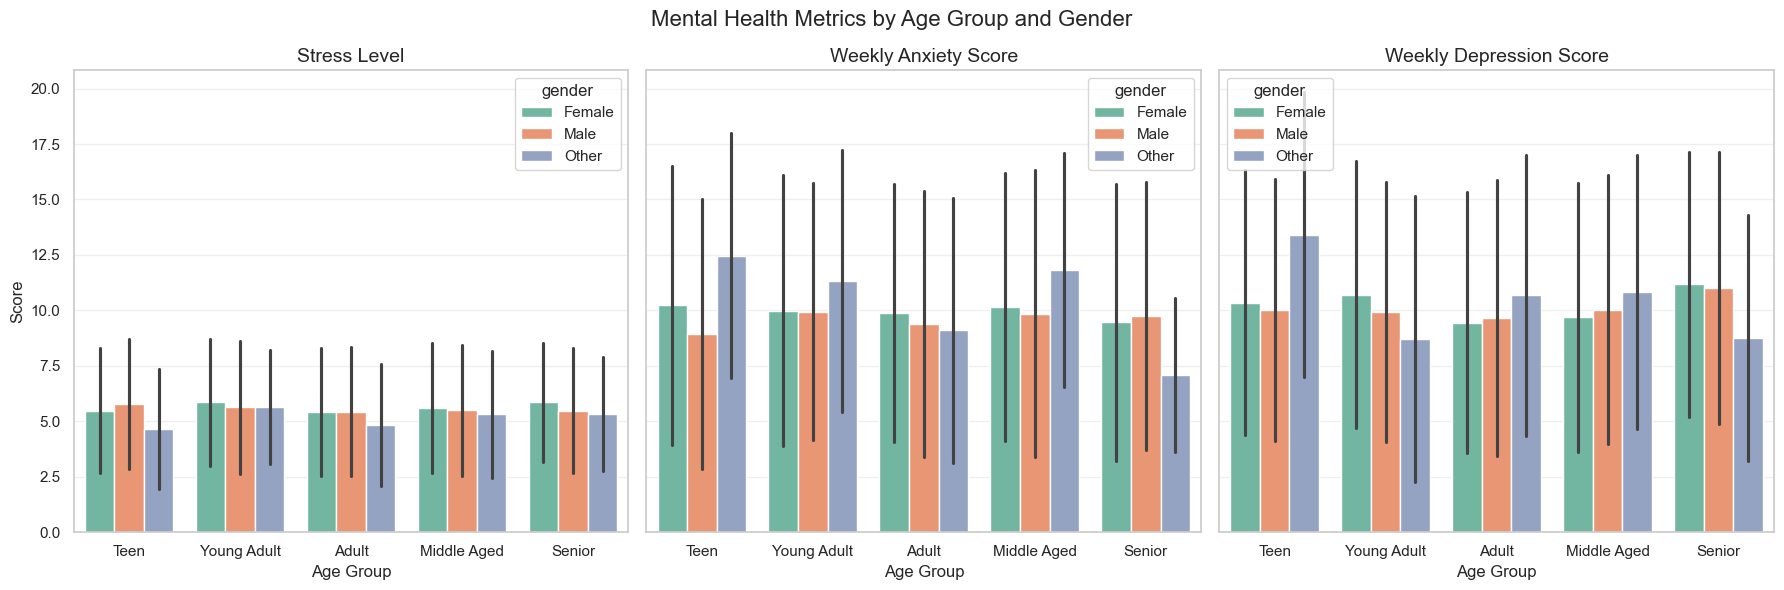

In [5]:
# Define metrics to plot
metrics = ['stress_level', 'weekly_anxiety_score', 'weekly_depression_score']
titles = ['Stress Level', 'Weekly Anxiety Score', 'Weekly Depression Score']
colors = ['coolwarm', 'magma', 'viridis']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, metric in enumerate(metrics):
    sns.barplot(
        data=mental_health_df,
        x='age_group',
        y=metric,
        hue='gender',
        ci='sd',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel('Score' if i == 0 else "")
    axes[i].grid(True, axis='y', alpha=0.3)

# General layout
fig.suptitle('Mental Health Metrics by Age Group and Gender', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

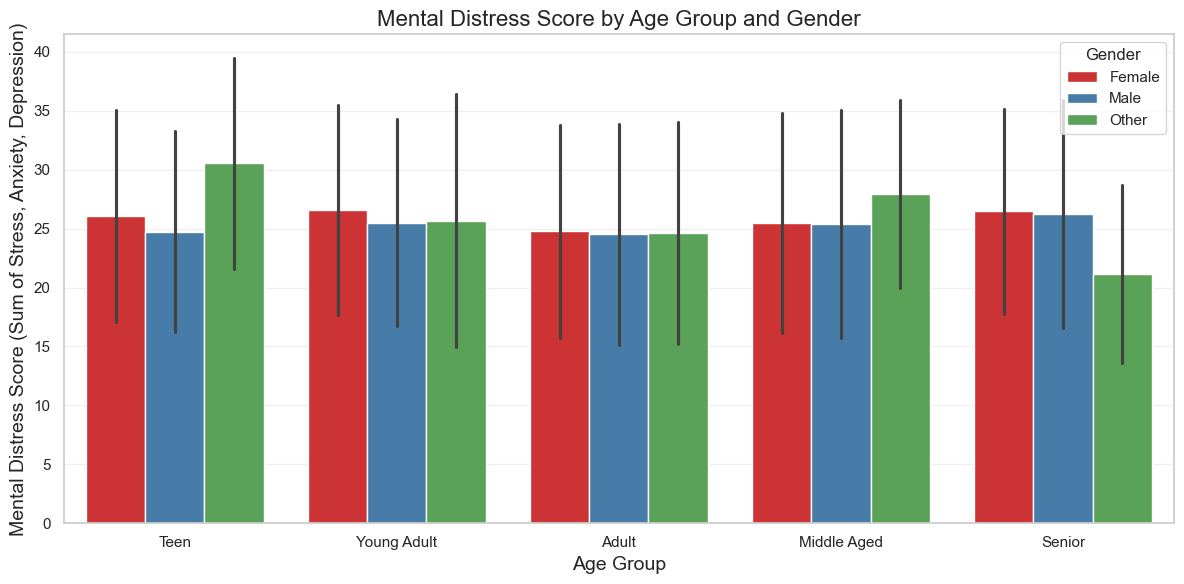

In [6]:

plt.figure(figsize=(12, 6))
sns.barplot(
    x='age_group',
    y='mental_distress_score',
    hue='gender',
    data=mental_health_df,
    palette='Set1',
    ci='sd'
)

plt.title('Mental Distress Score by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Mental Distress Score (Sum of Stress, Anxiety, Depression)', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#### screen Time

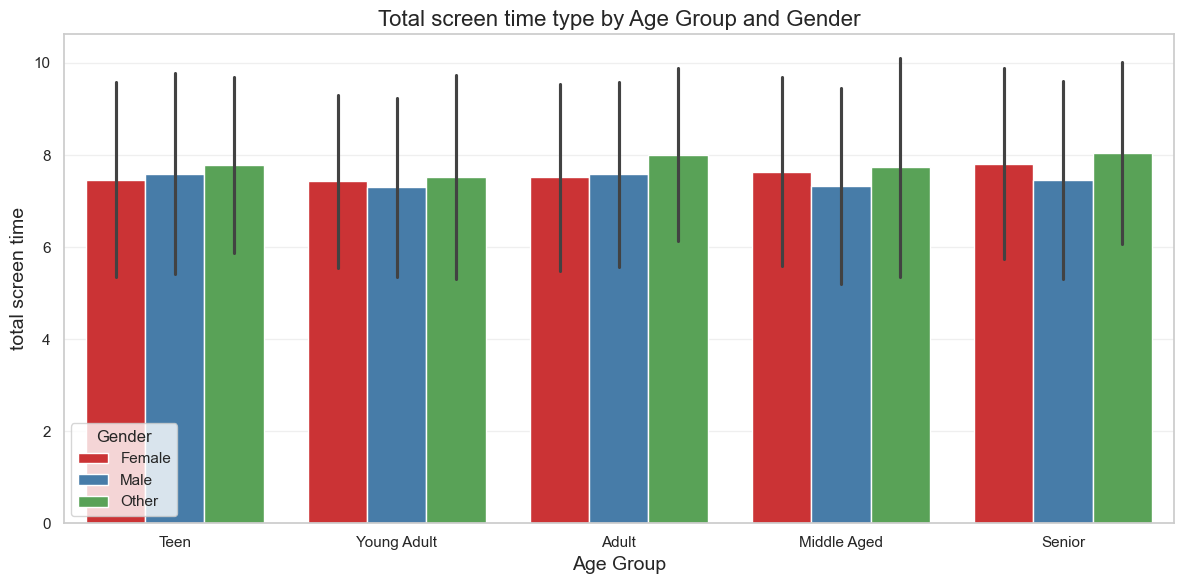

In [7]:

plt.figure(figsize=(12, 6))
sns.barplot(
    x='age_group',
    y='total_screen_time_type_score',
    hue='gender',
    data=mental_health_df,
    palette='Set1',
    ci='sd'
)

plt.title('Total screen time type by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('total screen time', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

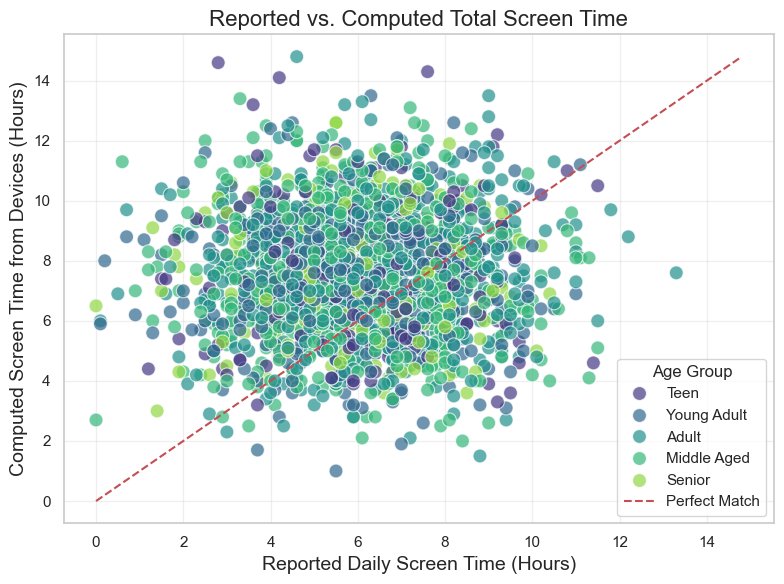

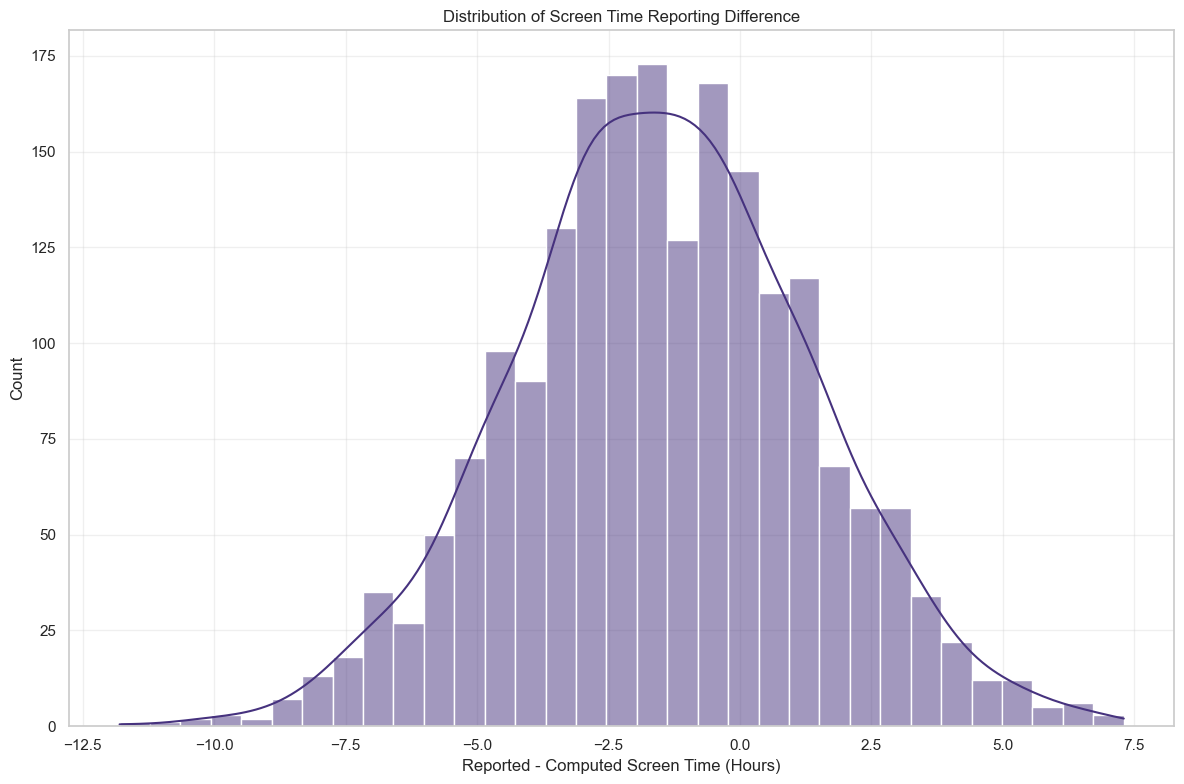

Correlation between reported and computed screen time: 0.01


In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='daily_screen_time_hours',
    y='total_screen_time_type_score',
    hue='age_group',
    data=mental_health_df,
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.plot([0, mental_health_df[['daily_screen_time_hours', 'total_screen_time_type_score']].max().max()], 
         [0, mental_health_df[['daily_screen_time_hours', 'total_screen_time_type_score']].max().max()], 
         'r--', label='Perfect Match')

plt.title('Reported vs. Computed Total Screen Time', fontsize=16)
plt.xlabel('Reported Daily Screen Time (Hours)', fontsize=14)
plt.ylabel('Computed Screen Time from Devices (Hours)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

sns.histplot(mental_health_df['screen_time_difference'], kde=True)
plt.title('Distribution of Screen Time Reporting Difference')
plt.xlabel('Reported - Computed Screen Time (Hours)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation = mental_health_df[['daily_screen_time_hours', 'total_screen_time_type_score']].corr().iloc[0,1]
print(f"Correlation between reported and computed screen time: {correlation:.2f}")

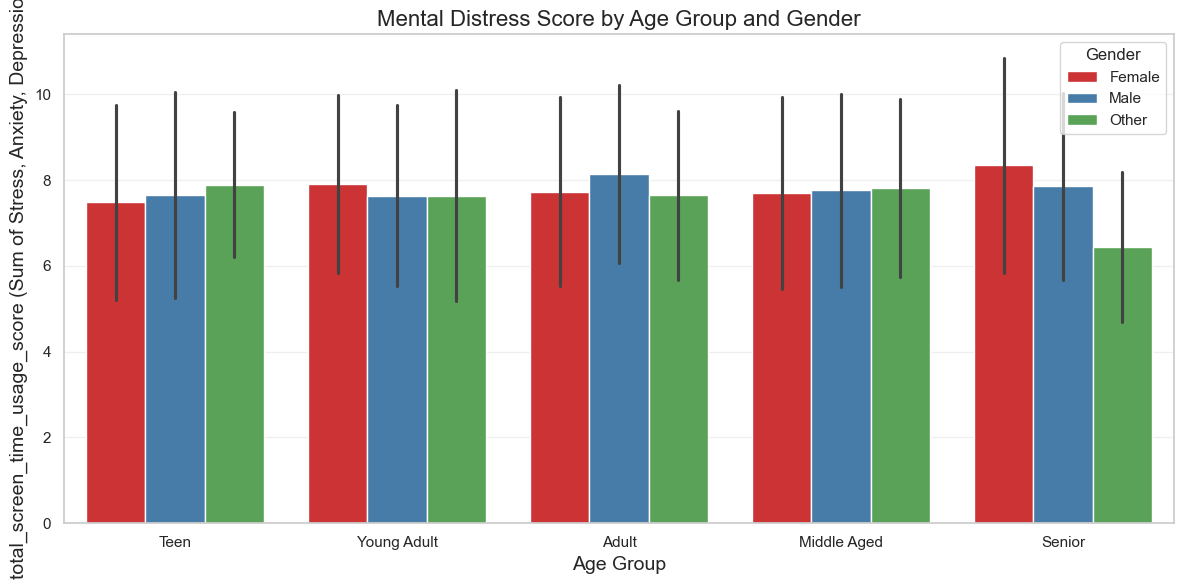

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='age_group',
    y='total_screen_time_usage_score',
    hue='gender',
    data=mental_health_df,
    palette='Set1',
    ci='sd'
)

plt.title('Mental Distress Score by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('total_screen_time_usage_score (Sum of Stress, Anxiety, Depression)', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

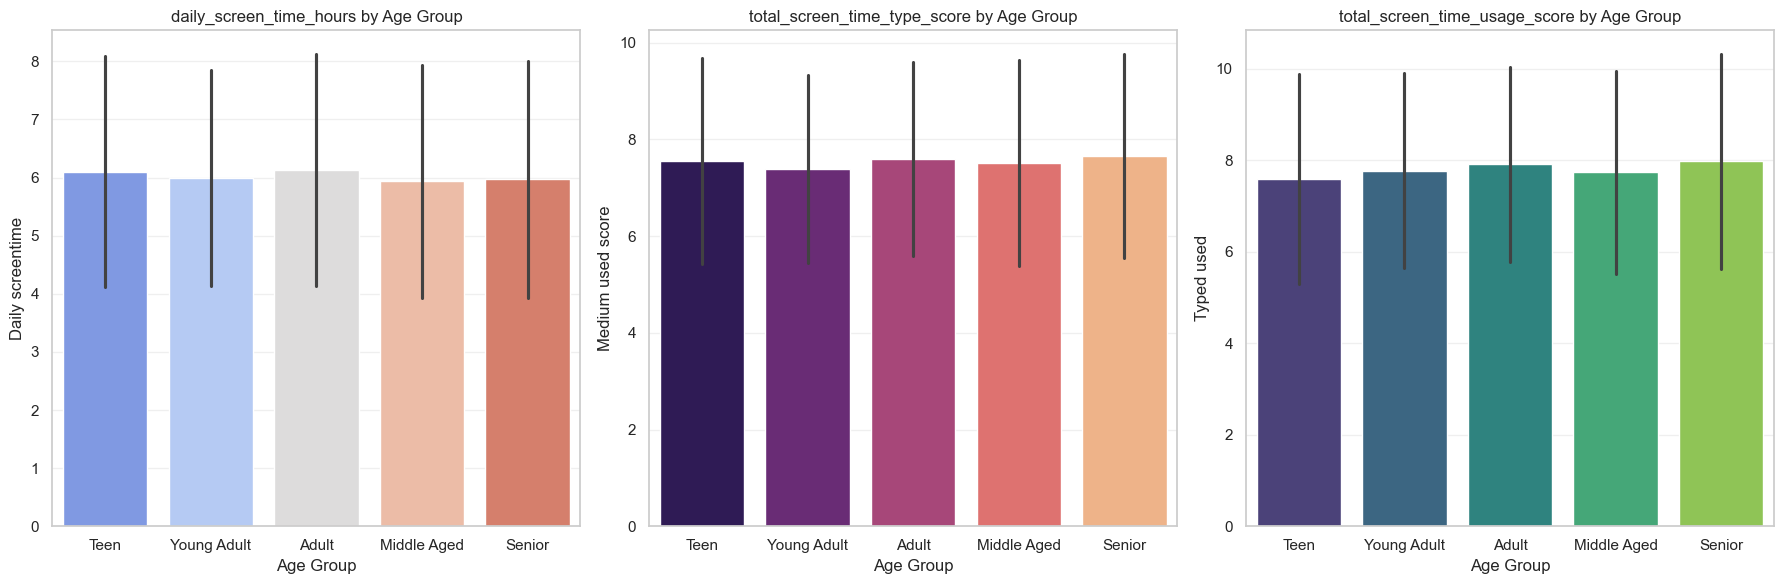

In [10]:
# Create 1 row, 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot 1: Stress Level
sns.barplot(x='age_group', y='daily_screen_time_hours', data=mental_health_df, palette='coolwarm', ci='sd', ax=axes[0])
axes[0].set_title('daily_screen_time_hours by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Daily screentime')
axes[0].grid(True, axis='y', alpha=0.3)

# Plot 2: Weekly Anxiety Score
sns.barplot(x='age_group', y='total_screen_time_type_score', data=mental_health_df, palette='magma', ci='sd', ax=axes[1])
axes[1].set_title('total_screen_time_type_score by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Medium used score')
axes[1].grid(True, axis='y', alpha=0.3)

# Plot 3: Weekly Depression Score
sns.barplot(x='age_group', y='total_screen_time_usage_score', data=mental_health_df, palette='viridis', ci='sd', ax=axes[2])
axes[2].set_title('total_screen_time_usage_score by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Typed used')
axes[2].grid(True, axis='y', alpha=0.3)

# Improve layout
plt.tight_layout()
plt.show()

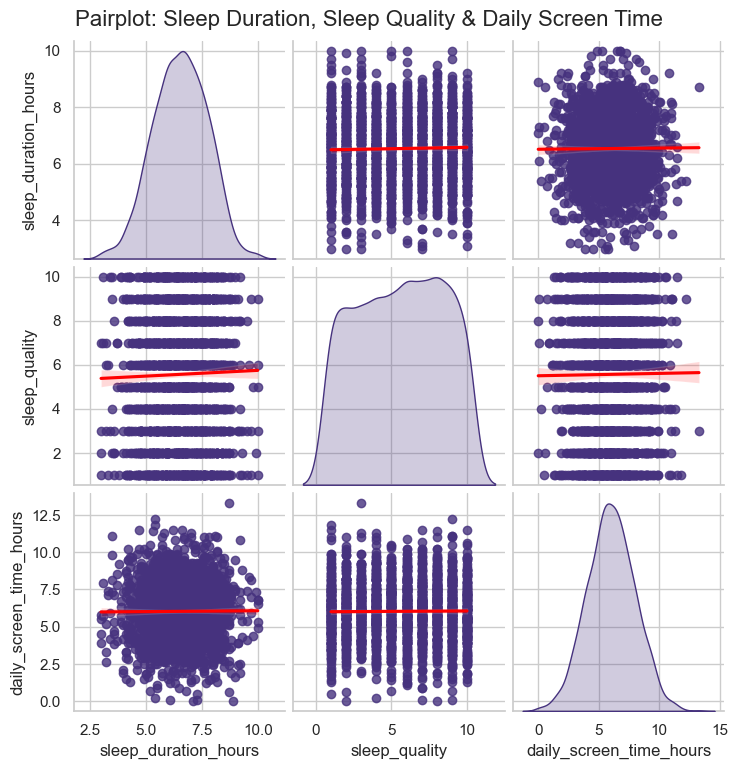

In [11]:
sns.pairplot(
    mental_health_df,
    vars=['sleep_duration_hours', 'sleep_quality', 'daily_screen_time_hours'],
    kind='reg',  # Adds regression lines
    diag_kind='kde',  # Density plot on diagonal
    plot_kws={'line_kws':{'color':'red'}}
)

plt.suptitle('Pairplot: Sleep Duration, Sleep Quality & Daily Screen Time', fontsize=16, y=1.02)
plt.show()

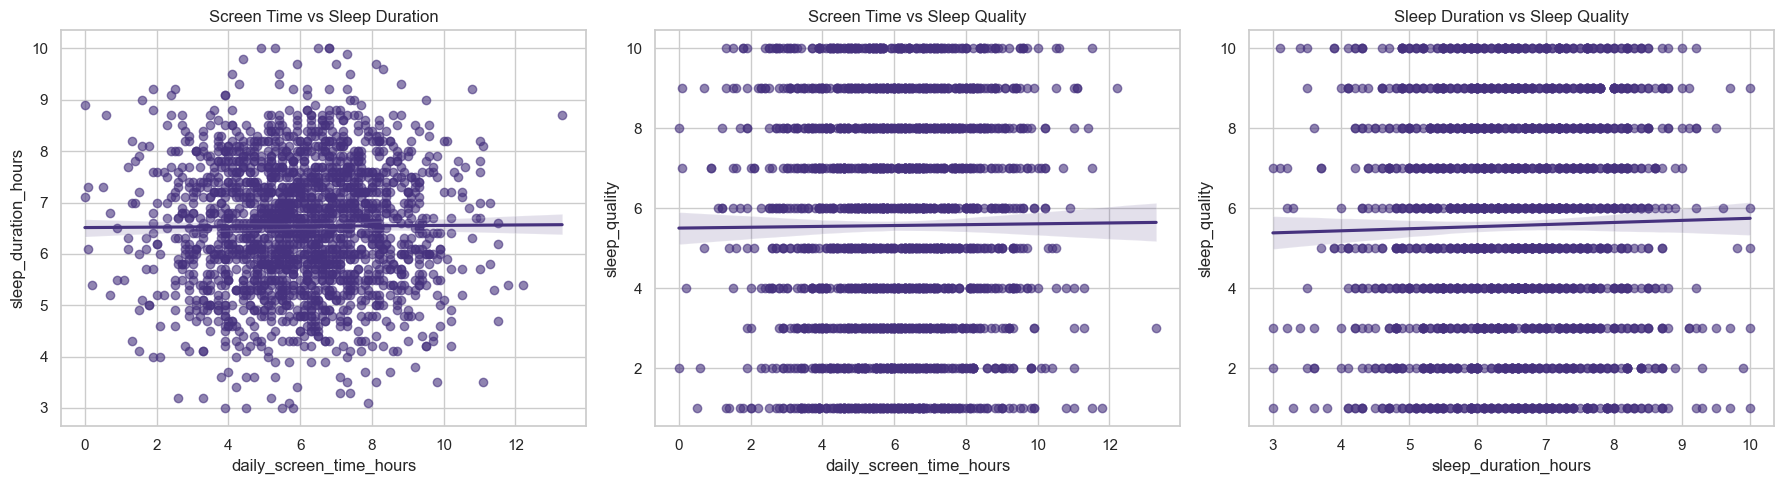

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x='daily_screen_time_hours', y='sleep_duration_hours', data=mental_health_df, ax=axes[0], scatter_kws={'alpha':0.6})
axes[0].set_title('Screen Time vs Sleep Duration')

sns.regplot(x='daily_screen_time_hours', y='sleep_quality', data=mental_health_df, ax=axes[1], scatter_kws={'alpha':0.6})
axes[1].set_title('Screen Time vs Sleep Quality')

sns.regplot(x='sleep_duration_hours', y='sleep_quality', data=mental_health_df, ax=axes[2], scatter_kws={'alpha':0.6})
axes[2].set_title('Sleep Duration vs Sleep Quality')

plt.tight_layout()
plt.show()

In [13]:
corr_matrix = mental_health_df[['sleep_duration_hours', 'sleep_quality', 'daily_screen_time_hours']].corr()
print(corr_matrix)

                         sleep_duration_hours  sleep_quality  \
sleep_duration_hours                 1.000000       0.022219   
sleep_quality                        0.022219       1.000000   
daily_screen_time_hours              0.006899       0.007493   

                         daily_screen_time_hours  
sleep_duration_hours                    0.006899  
sleep_quality                           0.007493  
daily_screen_time_hours                 1.000000  
